<a href="https://colab.research.google.com/github/sarahbarnes1994/Project2/blob/main/Final_Program_Sarah_Barnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

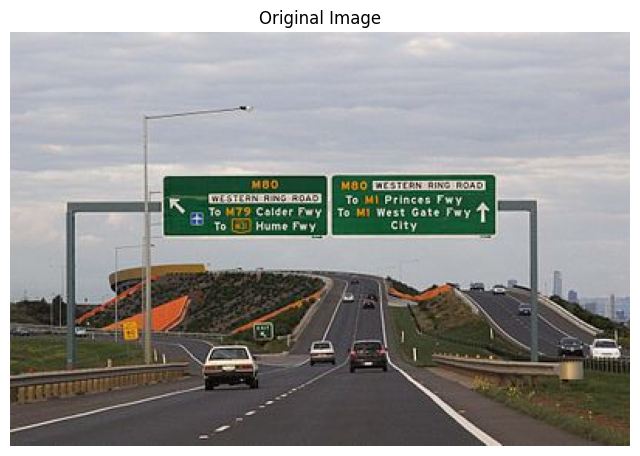

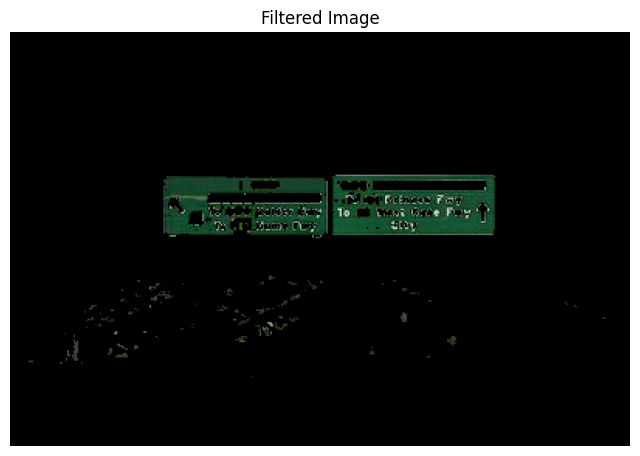

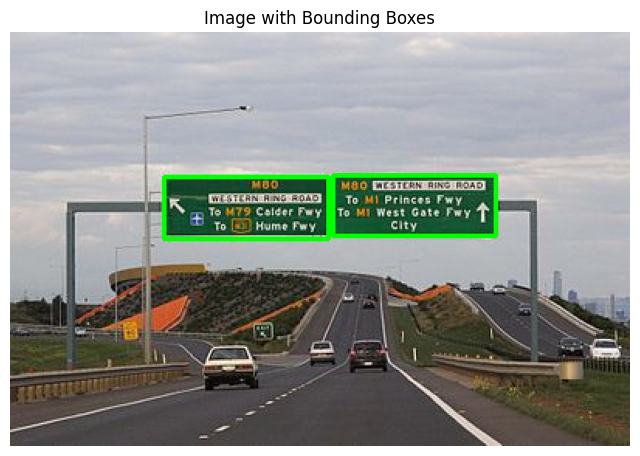

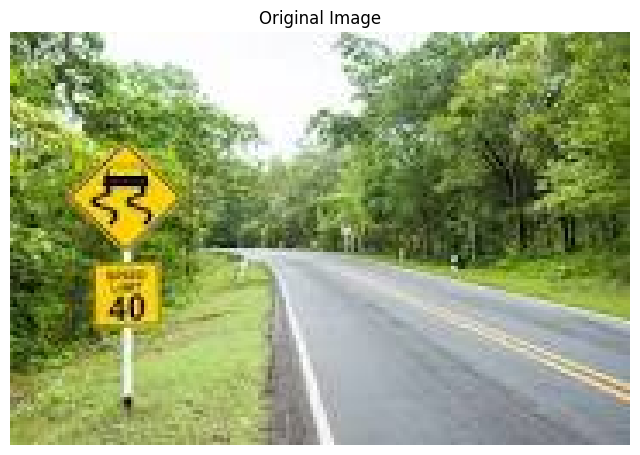

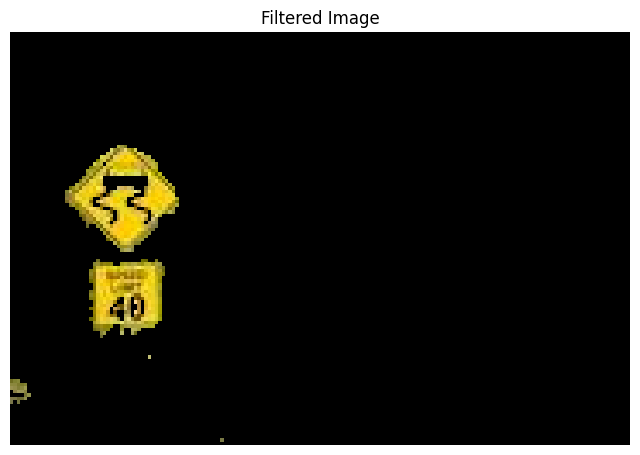

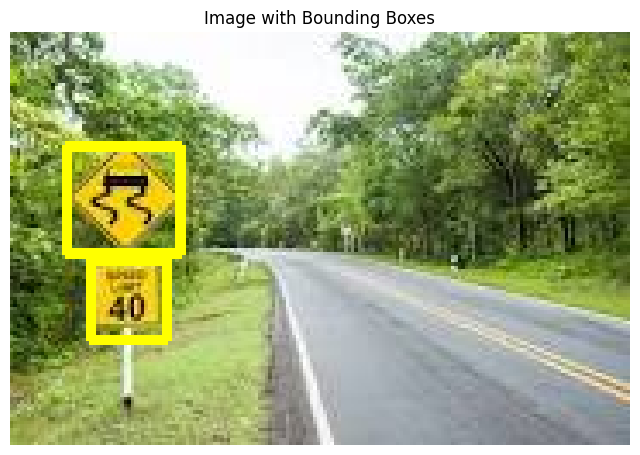

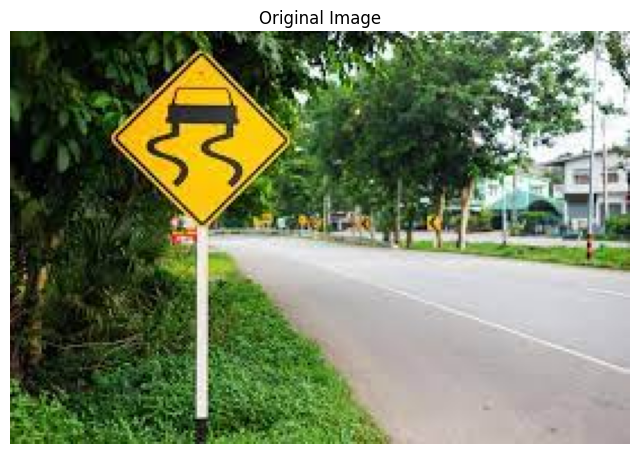

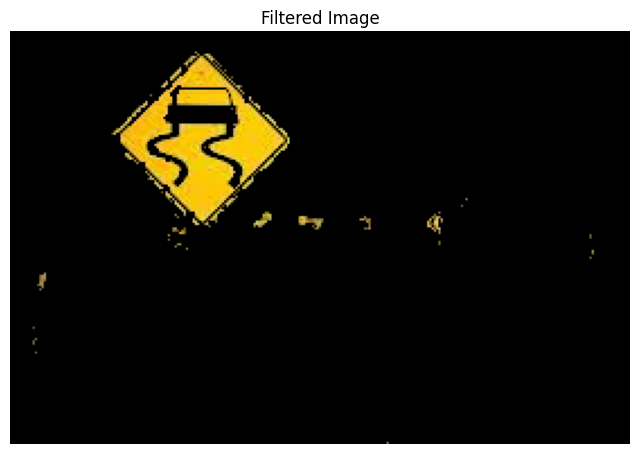

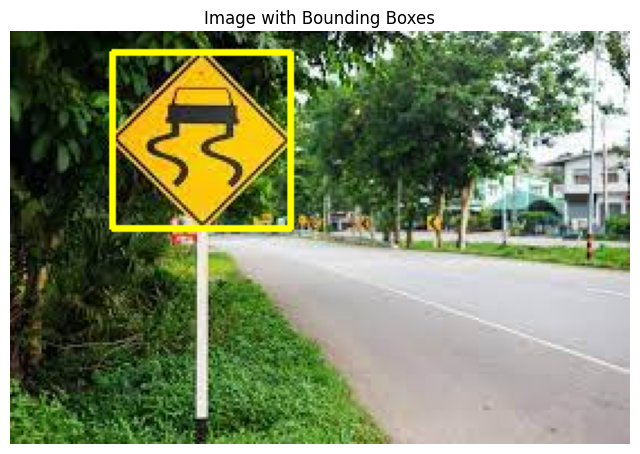

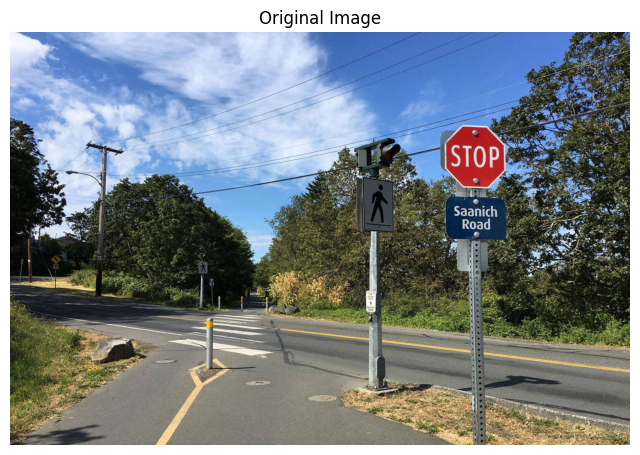

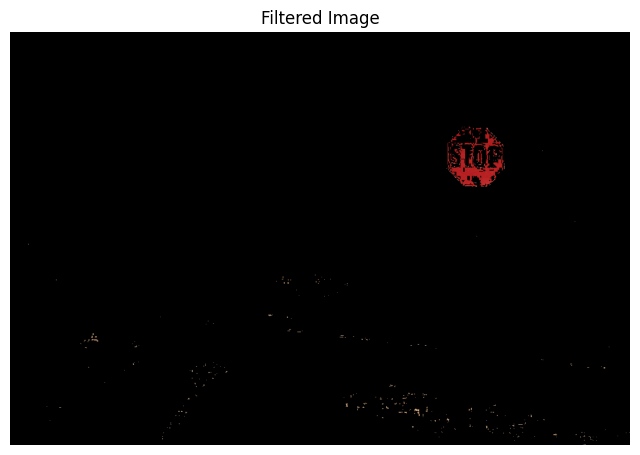

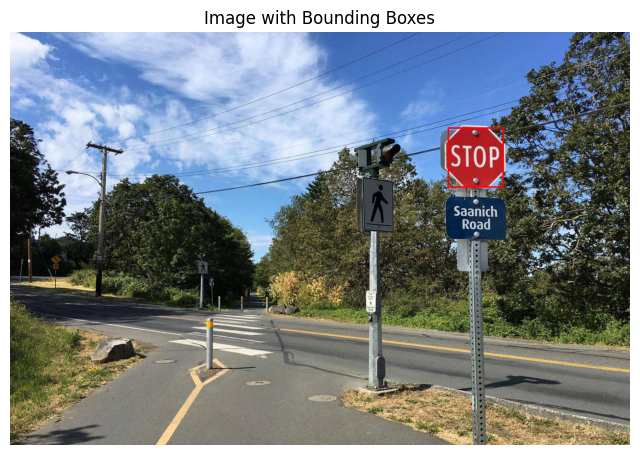

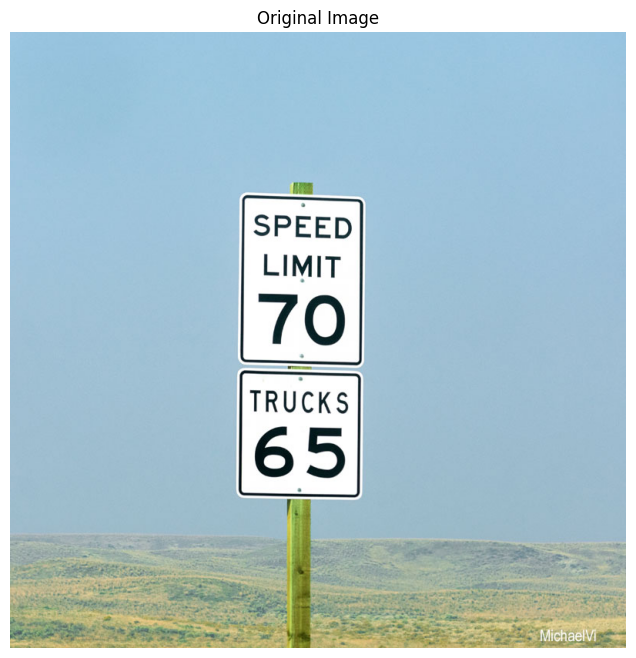

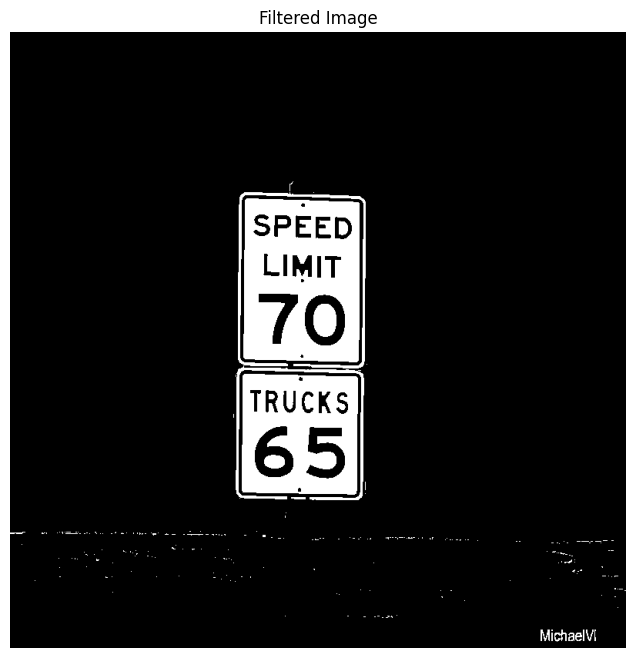

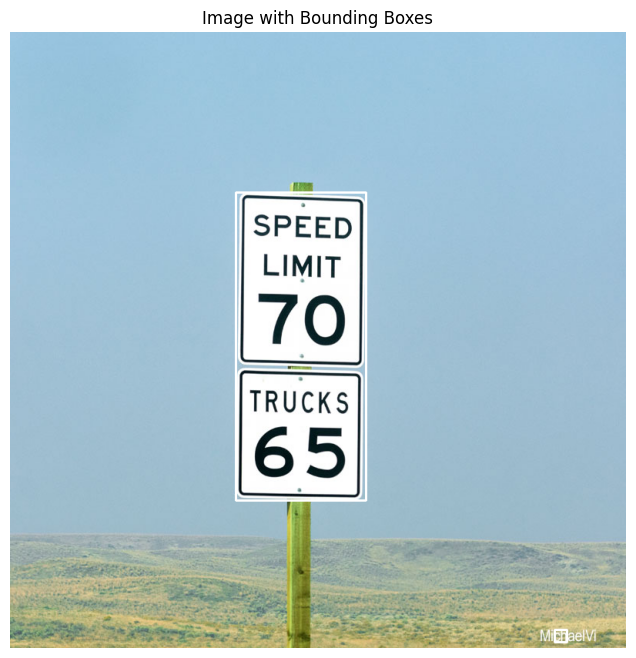

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_traffic_signs(image_path, color_lower, color_upper, color_bgr):
    # Load the original image
    original_image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if original_image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the original image to HSV color space
    hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

    # Create a mask for the specified color range
    mask = cv2.inRange(hsv, color_lower, color_upper)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image for drawing
    image_with_boxes = original_image.copy()

    # Loop through the contours and draw bounding boxes around the signs
    for contour in contours:
        area = cv2.contourArea(contour)

        # Threshold (May need to adjust)
        if 100 < area < 10000:
            # Draw a bounding box around the sign
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), color_bgr, 2)

    # Add labels for images
    label_original = "Original Image"
    label_filtered = "Filtered Image"
    label_with_boxes = "Image with Bounding Boxes"

    # Display the original image with label
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(label_original)
    plt.axis('off')
    plt.show()

    # Display the image after applying color filtering with label
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(cv2.bitwise_and(original_image, original_image, mask=mask), cv2.COLOR_BGR2RGB))
    plt.title(label_filtered)
    plt.axis('off')
    plt.show()

    # Display the image with bounding boxes with label
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(label_with_boxes)
    plt.axis('off')
    plt.show()

def detect_white_signs(image_path):
    # Load the original image
    original_image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if original_image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the original image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding to identify regions with black color (text)
    _, black_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply morphological operations to enhance black regions
    kernel = np.ones((5, 5), np.uint8)
    black_mask = cv2.morphologyEx(black_mask, cv2.MORPH_CLOSE, kernel)
    black_mask = cv2.morphologyEx(black_mask, cv2.MORPH_OPEN, kernel)

    # Create a mask for the specified color range
    hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
    white_mask = cv2.inRange(hsv, np.array([0, 0, 200]), np.array([180, 50, 255]))

    # Combine the masks to filter out black lettering on white signs
    combined_mask = cv2.bitwise_and(white_mask, cv2.bitwise_not(black_mask))

    # Find contours in the combined mask
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image for drawing
    image_with_boxes = original_image.copy()

    # Loop through the contours and draw bounding boxes around the signs
    for contour in contours:
        area = cv2.contourArea(contour)

        # Threshold (May need to adjust)
        if 100 < area < 10000:
            # Draw a bounding box around the sign on the original image
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (255, 255, 255), 2)

    # Add labels for images
    label_original = "Original Image"
    label_filtered = "Filtered Image"
    label_with_boxes = "Image with Bounding Boxes"

    # Display the original image with label
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(label_original)
    plt.axis('off')
    plt.show()

    # Display the combined mask with label
    plt.figure(figsize=(8, 8))
    plt.imshow(combined_mask, cmap='gray')
    plt.title(label_filtered)
    plt.axis('off')
    plt.show()

    # Display the image with bounding boxes with label
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(label_with_boxes)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    image1 = "/content/drive/MyDrive/Colab Notebooks/Image Processing/Road Sign.jpg"
    image2 = "/content/drive/MyDrive/Colab Notebooks/Image Processing/RoadSign2.jpg"
    image3 = "/content/drive/MyDrive/Colab Notebooks/Image Processing/RoadSign3.jpg"
    image4 = "/content/drive/MyDrive/Colab Notebooks/Image Processing/RoadSign4.jpg"
    image5 = "/content/drive/MyDrive/Colab Notebooks/Image Processing/RoadSign5.jpg"

    # Specify color information for each type of sign
    green_lower = np.array([40, 40, 40])
    green_upper = np.array([80, 255, 255])
    green_bgr = (0, 255, 0)

    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([30, 255, 255])
    yellow_bgr = (0, 255, 255)

    red_lower = np.array([0, 70, 150])
    red_upper = np.array([15, 255, 255])
    red_bgr = (0, 0, 255)

    # Call the function for each type of sign
    detect_traffic_signs(image2, green_lower, green_upper, green_bgr)
    detect_traffic_signs(image1, yellow_lower, yellow_upper, yellow_bgr)
    detect_traffic_signs(image3, yellow_lower, yellow_upper, yellow_bgr)
    detect_traffic_signs(image4, red_lower, red_upper, red_bgr)
    detect_white_signs(image5)



**Project Overview:**
The project focuses on the development of a computer vision algorithm for the detection and visualization of traffic signs in images. The primary goal is to enhance the accuracy of sign detection, improve visualization techniques, and potentially contribute to the advancement of autonomous vehicle systems and traffic management.

**Contribution and Implementation:**
**Color Filtering and Contour Detection:**
The color filtering and contour detection components of the algorithm are implemented based on established computer vision techniques. These methods are adapted to the specific task of detecting traffic signs with predefined color characteristics. The approach to contour filtering and criteria for retaining contours are tailored to the problem at hand.

**Optical Character Recognition (OCR):**
The integration of Optical Character Recognition (OCR) using Tesseract is a significant contribution. The OCR functionality enhances the algorithm's capability to extract textual information from detected signs, providing a more comprehensive understanding of the signage content.

**Visualization and Labeling:**
The visualization aspect, including the creation of bounding boxes and labeling, is implemented to provide clear and interpretable results. This part involves custom code to display the original image with bounding boxes, the filtered image, and the image with bounding boxes, aiding in qualitative assessment.

**References:**
The implementation is primarily based on the integration of various computer vision techniques and libraries. No direct code or algorithms from existing sources were used. However, the following references provided foundational knowledge and guidance:

**OpenCV Documentation:** Reference for OpenCV functions and techniques used in color filtering, contour detection, and image manipulation.

**Tesseract OCR Documentation:** Guidance on integrating Tesseract OCR for text extraction in images.

**Python Libraries/ Packages Used:**
OpenCV: Used for image loading, color space conversion, contour detection, and image manipulation.

NumPy: Utilized for array manipulation and numerical operations.

google.colab.patches: Used for displaying images in the Google Colab environment.

pytesseract: Integrated for Optical Character Recognition (OCR) capabilities.

**Image Processing/ Computer Vision Algorithms:**
**Color Filtering:**
The algorithm employs color filtering in the HSV color space to isolate specific color ranges corresponding to different traffic signs. This is chosen for its effectiveness in separating colors, especially in varying lighting conditions.

**Contour Detection:**
OpenCV's contour detection algorithm is utilized to identify potential traffic signs. Contours are filtered based on area and aspect ratio to retain only those likely to represent signs, contributing to noise reduction.

**Optical Character Recognition (OCR):**
Tesseract OCR is integrated to extract text from detected signs, providing valuable information about the content of the signage.

**Discussion and Analysis:**
The implemented methods significantly improve the detection and visualization of traffic signs in images. Color filtering helps highlight relevant regions, contour detection identifies potential signs, and OCR extracts textual information. The algorithm provides a foundation for further development in autonomous vehicle systems and traffic management.

**Future Work:**
The current limitation of identifying only one color at a time could be addressed in future work. Potential directions include the development of a more sophisticated algorithm capable of simultaneously identifying and distinguishing between multiple colors. Additionally, future work may involve the exploration of deep learning techniques for more robust sign detection, real-time implementation for video stream processing, and expanding the dataset for improved generalization across diverse scenarios. Ongoing refinement of color ranges and contour detection parameters is crucial for enhancing the algorithm's adaptability and accuracy.

Sources used:
Traffic sign colors from 0-255: http://www.trafficsign.us/signcolor.html

ChatGPT used to troubleshoot